In [1]:
import os
import pandas as pd
import boto3
import seaborn as sns
from io import StringIO
from dotenv import load_dotenv

pd.set_option('display.max_columns', 50)
dotenv = 'D:\dev\environment\.env'

In [2]:
load_dotenv(dotenv)
aws_access_key = os.getenv('AWS_ACCESS_KEY')
aws_secret_key = os.getenv('AWS_SECRET_KEY')

In [5]:
def read_csv_from_s3(bucket: str, path: str, filename: str) -> pd.DataFrame:
    """
    Reads a CSV file from an Amazon S3 bucket into a Pandas DataFrame.

    Parameters:
    - bucket (str): The name of the Amazon S3 bucket.
    - path (str): The path within the bucket where the CSV file is located.
    - filename (str): The name of the CSV file to be read.

    Returns:
    - pd.DataFrame: A Pandas DataFrame containing the data read from the CSV file.

    Note:
    - Requires the boto3 library to be installed.
    - Assumes the CSV file is UTF-8 encoded.
    """
    
    s3 = boto3.client('s3', aws_access_key_id = aws_access_key, aws_secret_access_key = aws_secret_key)
    full_path = f'{path}{filename}'
    
    object = s3.get_object(Bucket=bucket, Key=full_path)
    object = object['Body'].read().decode('utf-8')
    
    return pd.read_csv(StringIO(object))

In [6]:
bucket = 'chicago-taxi'
payment_type_path = 'transformed_data/payment_type/'
payment_type_file = 'payment_type_master.csv'

community_areas_path = 'transformed_data/community_areas/'
community_areas_file = 'community_areas_master.csv'

company_path = 'transformed_data/company/'
company_file = 'company_master.csv'

date_path = 'transformed_data/date/'
date_file = 'date_dim.csv'

weather_path = 'transformed_data/weather/'
weather_file = ''

taxi_trips_path = 'transformed_data/taxi_trips/'
taxi_trips_file = ''

In [7]:
s3 = boto3.client('s3', aws_access_key_id = aws_access_key, aws_secret_access_key = aws_secret_key)

community_areas = read_csv_from_s3(bucket=bucket, path=community_areas_path, filename=community_areas_file )
company = read_csv_from_s3(bucket=bucket, path=company_path, filename=company_file )
date = read_csv_from_s3(bucket=bucket, path=date_path, filename=date_file )
payment_type = read_csv_from_s3(bucket=bucket, path=payment_type_path, filename=payment_type_file )

In [8]:
trips_list = []
weather_list = []

In [9]:
#Taxi data transformation and loading
for file in s3.list_objects(Bucket = bucket, Prefix = taxi_trips_path)['Contents']:
    taxi_trip_key = file['Key']
    if taxi_trip_key.split('/')[-1].strip() != '':
        if taxi_trip_key.split('.')[1] == 'csv':
            filename = taxi_trip_key.split('/')[-1].strip()
            trip = read_csv_from_s3(bucket=bucket, path=taxi_trips_path, filename=filename)
            trips_list.append(trip)
            print(f'{filename} has been added.')

taxi_2024-03-15.csv has been added.
taxi_2024-03-16.csv has been added.
taxi_2024-03-17.csv has been added.
taxi_2024-03-18.csv has been added.
taxi_2024-03-19.csv has been added.
taxi_2024-03-20.csv has been added.
taxi_2024-03-21.csv has been added.
taxi_2024-03-22.csv has been added.


In [10]:
trips_df = pd.concat(trips_list, ignore_index=True)

In [11]:
trips_df.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area_id,dropoff_community_area_id,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,datetime_for_weather,payment_type_id,company_id,company
0,00c6d0cc3d95795a2b9cb3fcbb3afa8eed897ac7,3ae83cc261cea27eafc3d9b18bbc93100c03762e8b6971...,2024-03-15T23:45:00.000,2024-03-16T00:15:00.000,1680,1.00,76,32,42.25,9.55,0.0,5.0,56.8,41.979071,-87.903040,41.884987,-87.620993,2024-03-15 23:00:00,1,2.0,NaN
1,fd729619c5458746ffe602406d2f86cb4059ee35,3c814d3baedca9be4de8ddb5547c7dec404a08e148740e...,2024-03-15T23:45:00.000,2024-03-16T00:15:00.000,1569,18.06,76,8,44.50,14.70,0.0,4.0,63.7,41.980264,-87.913625,41.899602,-87.633308,2024-03-15 23:00:00,1,1.0,NaN
2,f8aef1517ec3953a3805d0912f92f994e1245205,9de14279ac4dc5696c73c13b07b0aaf2b1a1796dda9f4c...,2024-03-15T23:45:00.000,2024-03-15T23:45:00.000,336,1.64,22,24,10.00,2.00,0.0,0.0,12.0,41.922761,-87.699155,41.901207,-87.676356,2024-03-15 23:00:00,4,8.0,NaN
3,efa623a2405100c731e62efc223d3c02ddee3d8a,8a999732f0972dda5aa358ad377427f0cb844b5ec246a9...,2024-03-15T23:45:00.000,2024-03-16T00:00:00.000,1370,5.51,38,8,18.50,0.00,0.0,1.0,19.5,41.812949,-87.617860,41.899602,-87.633308,2024-03-15 23:00:00,3,3.0,NaN
4,ebbf769b25db8056d8ffc0b27f982ac1102eab4e,7ff3ea8c15d902e432f0f3ca3aab1d5f20bff4c4fedfb5...,2024-03-15T23:45:00.000,2024-03-15T23:45:00.000,600,2.30,6,8,9.00,2.10,0.0,1.0,12.1,41.944227,-87.655998,41.899602,-87.633308,2024-03-15 23:00:00,1,2.0,NaN


In [12]:
#Weather data trandform and loading
for file in s3.list_objects(Bucket = bucket, Prefix = weather_path)['Contents']:
    weather_key = file['Key']
    
    if weather_key.split('/')[-1].strip() != '':
        if weather_key.split('.')[1] == 'csv':
            filename = weather_key.split('/')[-1].strip()
            weather = read_csv_from_s3(bucket=bucket, path=weather_path, filename=filename)
            weather_list.append(weather)
            print(f'{filename} has been added.')


weather_2024-03-15.csv has been added.
weather_2024-03-16.csv has been added.
weather_2024-03-17.csv has been added.
weather_2024-03-18.csv has been added.
weather_2024-03-19.csv has been added.
weather_2024-03-20.csv has been added.
weather_2024-03-21.csv has been added.
weather_2024-03-22.csv has been added.


In [13]:
weather_df = pd.concat(weather_list, ignore_index=True)

In [14]:
weather_df.head()

,datetime,temperature,wind,precipitation,rain
0,2024-03-15 00:00:00,6.5,36.4,0.1,0.1
1,2024-03-15 01:00:00,5.8,36.1,0.0,0.0
2,2024-03-15 02:00:00,4.8,30.5,0.0,0.0
3,2024-03-15 03:00:00,4.7,29.3,0.0,0.0
4,2024-03-15 04:00:00,4.4,27.1,0.0,0.0


In [15]:
community_areas.head()

,Area code,Area name
0,1,Rogers Park
1,2,West Ridge
2,3,Uptown
3,4,Lincoln Square
4,5,North Center


In [16]:
company.head()

,company_id,company
0,1,Sun Taxi
1,2,Taxi Affiliation Services
2,3,Flash Cab
3,4,Blue Ribbon Taxi Association
4,5,5 Star Taxi


In [17]:
date.head()

,date,year,month,month name,day,day of week,day of name,is_weekend,is_holiday
0,2023-01-01,2023,1,January,1,7,Sunday,True,True
1,2023-01-02,2023,1,January,2,1,Monday,False,False
2,2023-01-03,2023,1,January,3,2,Tuesday,False,False
3,2023-01-04,2023,1,January,4,3,Wednesday,False,False
4,2023-01-05,2023,1,January,5,4,Thursday,False,False


In [18]:
payment_type.head()

,payment_type_id,payment_type
0,1,Credit Card
1,2,Cash
2,3,Prcard
3,4,Mobile
4,5,Unknown


#### Join data

In [19]:
trips_full_df = pd.merge(trips_df, weather_df, left_on='datetime_for_weather', right_on='datetime', how='inner')
trips_full_df = trips_full_df.drop(columns='datetime_for_weather')

In [20]:
trips_full_df = pd.merge(trips_full_df, company, left_on='company_id', right_on='company_id', how='inner')
trips_full_df = trips_full_df.drop(columns='company_id')

In [21]:
trips_full_df = pd.merge(trips_full_df, payment_type, left_on='payment_type_id', right_on='payment_type_id', how='inner')
trips_full_df = trips_full_df.drop(columns='payment_type_id')

In [22]:
trips_full_df = pd.merge(trips_full_df, community_areas, left_on='pickup_community_area_id', right_on='Area code', how='inner')
trips_full_df = trips_full_df.drop(columns=['pickup_community_area_id', 'Area code'])

trips_full_df = trips_full_df.rename(columns={'Area name': 'pickup_community_area'})

In [23]:
trips_full_df.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,dropoff_community_area_id,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,company_x,datetime,temperature,wind,precipitation,rain,company_y,payment_type,pickup_community_area
0,00c6d0cc3d95795a2b9cb3fcbb3afa8eed897ac7,3ae83cc261cea27eafc3d9b18bbc93100c03762e8b6971...,2024-03-15T23:45:00.000,2024-03-16T00:15:00.000,1680,1.00,32,42.25,9.55,0.0,5.0,56.8,41.979071,-87.903040,41.884987,-87.620993,NaN,2024-03-15 23:00:00,4.7,9.8,0.0,0.0,Taxi Affiliation Services,Credit Card,O'Hare
1,fd729619c5458746ffe602406d2f86cb4059ee35,3c814d3baedca9be4de8ddb5547c7dec404a08e148740e...,2024-03-15T23:45:00.000,2024-03-16T00:15:00.000,1569,18.06,8,44.50,14.70,0.0,4.0,63.7,41.980264,-87.913625,41.899602,-87.633308,NaN,2024-03-15 23:00:00,4.7,9.8,0.0,0.0,Sun Taxi,Credit Card,O'Hare
2,f8aef1517ec3953a3805d0912f92f994e1245205,9de14279ac4dc5696c73c13b07b0aaf2b1a1796dda9f4c...,2024-03-15T23:45:00.000,2024-03-15T23:45:00.000,336,1.64,24,10.00,2.00,0.0,0.0,12.0,41.922761,-87.699155,41.901207,-87.676356,NaN,2024-03-15 23:00:00,4.7,9.8,0.0,0.0,City Service,Mobile,Logan Square
3,efa623a2405100c731e62efc223d3c02ddee3d8a,8a999732f0972dda5aa358ad377427f0cb844b5ec246a9...,2024-03-15T23:45:00.000,2024-03-16T00:00:00.000,1370,5.51,8,18.50,0.00,0.0,1.0,19.5,41.812949,-87.617860,41.899602,-87.633308,NaN,2024-03-15 23:00:00,4.7,9.8,0.0,0.0,Flash Cab,Prcard,Grand Boulevard
4,ebbf769b25db8056d8ffc0b27f982ac1102eab4e,7ff3ea8c15d902e432f0f3ca3aab1d5f20bff4c4fedfb5...,2024-03-15T23:45:00.000,2024-03-15T23:45:00.000,600,2.30,8,9.00,2.10,0.0,1.0,12.1,41.944227,-87.655998,41.899602,-87.633308,NaN,2024-03-15 23:00:00,4.7,9.8,0.0,0.0,Taxi Affiliation Services,Credit Card,Lake View


In [24]:
trips_full_df = pd.merge(trips_full_df, community_areas, left_on='dropoff_community_area_id', right_on='Area code', how='inner')
trips_full_df = trips_full_df.drop(columns=['dropoff_community_area_id', 'Area code'])
trips_full_df = trips_full_df.rename(columns={'Area name': 'dropoff_community_area'})

In [25]:
date['date'] = pd.to_datetime(date['date'])
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1827 non-null   datetime64[ns]
 1   year         1827 non-null   int64         
 2   month        1827 non-null   int64         
 3   month name   1827 non-null   object        
 4   day          1827 non-null   int64         
 5   day of week  1827 non-null   int64         
 6   day of name  1827 non-null   object        
 7   is_weekend   1827 non-null   bool          
 8   is_holiday   1827 non-null   bool          
dtypes: bool(2), datetime64[ns](1), int64(4), object(2)
memory usage: 103.6+ KB


In [26]:
trips_full_df['trip_start_timestamp'] = pd.to_datetime(trips_full_df['trip_start_timestamp'])

In [27]:
trips_full_df['trip_start_date'] = trips_full_df['trip_start_timestamp'].dt.date
trips_full_df['trip_start_date'] = pd.to_datetime(trips_full_df['trip_start_date'])

In [28]:
trips_full_df = pd.merge(trips_full_df, date, left_on='trip_start_date', right_on='date', how='inner')

In [29]:
trips_full_df.drop(columns=['date'], inplace=True)
trips_full_df.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,company_x,datetime,temperature,wind,precipitation,rain,company_y,payment_type,pickup_community_area,dropoff_community_area,trip_start_date,year,month,month name,day,day of week,day of name,is_weekend,is_holiday
0,00c6d0cc3d95795a2b9cb3fcbb3afa8eed897ac7,3ae83cc261cea27eafc3d9b18bbc93100c03762e8b6971...,2024-03-15 23:45:00,2024-03-16T00:15:00.000,1680,1.00,42.25,9.55,0.0,5.0,56.8,41.979071,-87.903040,41.884987,-87.620993,NaN,2024-03-15 23:00:00,4.7,9.8,0.0,0.0,Taxi Affiliation Services,Credit Card,O'Hare,Loop,2024-03-15,2024,3,March,15,5,Friday,False,False
1,fd729619c5458746ffe602406d2f86cb4059ee35,3c814d3baedca9be4de8ddb5547c7dec404a08e148740e...,2024-03-15 23:45:00,2024-03-16T00:15:00.000,1569,18.06,44.50,14.70,0.0,4.0,63.7,41.980264,-87.913625,41.899602,-87.633308,NaN,2024-03-15 23:00:00,4.7,9.8,0.0,0.0,Sun Taxi,Credit Card,O'Hare,Near North Side,2024-03-15,2024,3,March,15,5,Friday,False,False
2,f8aef1517ec3953a3805d0912f92f994e1245205,9de14279ac4dc5696c73c13b07b0aaf2b1a1796dda9f4c...,2024-03-15 23:45:00,2024-03-15T23:45:00.000,336,1.64,10.00,2.00,0.0,0.0,12.0,41.922761,-87.699155,41.901207,-87.676356,NaN,2024-03-15 23:00:00,4.7,9.8,0.0,0.0,City Service,Mobile,Logan Square,West Town,2024-03-15,2024,3,March,15,5,Friday,False,False
3,efa623a2405100c731e62efc223d3c02ddee3d8a,8a999732f0972dda5aa358ad377427f0cb844b5ec246a9...,2024-03-15 23:45:00,2024-03-16T00:00:00.000,1370,5.51,18.50,0.00,0.0,1.0,19.5,41.812949,-87.617860,41.899602,-87.633308,NaN,2024-03-15 23:00:00,4.7,9.8,0.0,0.0,Flash Cab,Prcard,Grand Boulevard,Near North Side,2024-03-15,2024,3,March,15,5,Friday,False,False
4,ebbf769b25db8056d8ffc0b27f982ac1102eab4e,7ff3ea8c15d902e432f0f3ca3aab1d5f20bff4c4fedfb5...,2024-03-15 23:45:00,2024-03-15T23:45:00.000,600,2.30,9.00,2.10,0.0,1.0,12.1,41.944227,-87.655998,41.899602,-87.633308,NaN,2024-03-15 23:00:00,4.7,9.8,0.0,0.0,Taxi Affiliation Services,Credit Card,Lake View,Near North Side,2024-03-15,2024,3,March,15,5,Friday,False,False


In [30]:
trips_full_df.describe()

,trip_start_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,temperature,wind,precipitation,rain,trip_start_date,year,month,day,day of week
count,48117,48117.000000,48117.000000,48117.000000,48117.000000,48117.000000,48117.000000,48117.000000,48117.000000,48117.000000,48117.000000,48117.000000,48117.000000,48117.000000,48117.000000,48117.000000,48117,48117.0,48117.0,48117.000000,48117.000000
mean,2024-03-16 11:53:47.632645376,1307.733857,6.534854,22.482746,2.971958,0.008185,1.698308,27.358705,41.902020,-87.699267,41.892296,-87.657153,5.378153,24.315924,0.002384,0.000588,2024-03-15 21:25:25.606334464,2024.0,3.0,15.892657,5.892657
min,2024-03-15 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.660136,-87.913625,-0.300000,7.700000,0.000000,0.000000,2024-03-15 00:00:00,2024.0,3.0,15.000000,5.000000
25%,2024-03-15 17:15:00,520.000000,0.960000,9.000000,0.000000,0.000000,0.000000,11.000000,41.878866,-87.750934,41.877406,-87.663416,2.700000,18.800000,0.000000,0.000000,2024-03-15 00:00:00,2024.0,3.0,15.000000,5.000000
50%,2024-03-16 13:15:00,1005.000000,3.080000,15.530000,1.600000,0.000000,0.000000,19.000000,41.899156,-87.642498,41.892508,-87.633308,3.800000,24.500000,0.000000,0.000000,2024-03-16 00:00:00,2024.0,3.0,16.000000,6.000000
75%,2024-03-17 05:30:00,1773.000000,11.830000,35.000000,4.320000,0.000000,3.000000,44.000000,41.965812,-87.625192,41.922686,-87.622173,5.700000,28.500000,0.000000,0.000000,2024-03-17 00:00:00,2024.0,3.0,17.000000,7.000000
max,2024-03-17 23:45:00,82325.000000,230.200000,500.000000,100.000000,77.710000,3100.550000,3109.100000,42.015934,-87.534903,42.015934,-87.534903,14.300000,41.800000,0.100000,0.100000,2024-03-17 00:00:00,2024.0,3.0,17.000000,7.000000
std,NaN,1519.847240,7.240745,17.190945,4.168284,0.425337,14.703464,25.347234,0.063544,0.112085,0.056618,0.066086,3.878901,7.254453,0.015254,0.007647,NaN,0.0,0.0,0.804383,0.804383


#### Visualizations
##### Find anomalies in data frame 

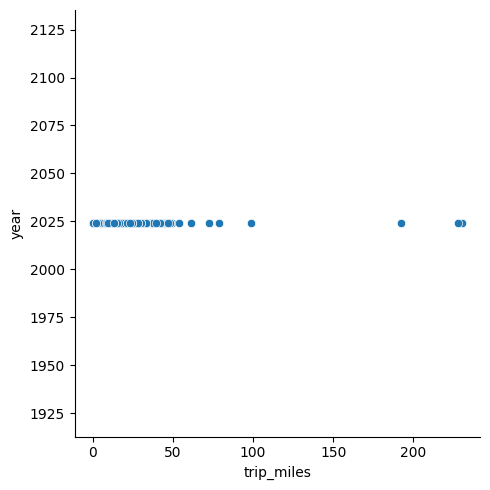

In [36]:
sns.relplot(
    data=trips_full_df,
    x='trip_miles',
    y='year',
    
)

<Axes: xlabel='fare', ylabel='payment_type'>

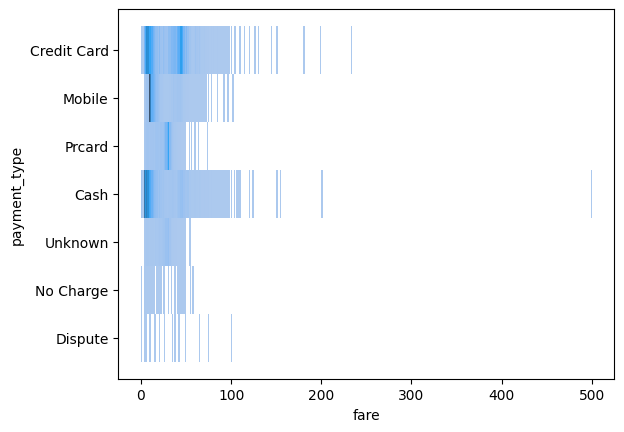

In [54]:
sns.histplot(
    data=trips_full_df,
    x='fare',
    y='payment_type'
)

<Axes: xlabel='temperature', ylabel='trip_total'>

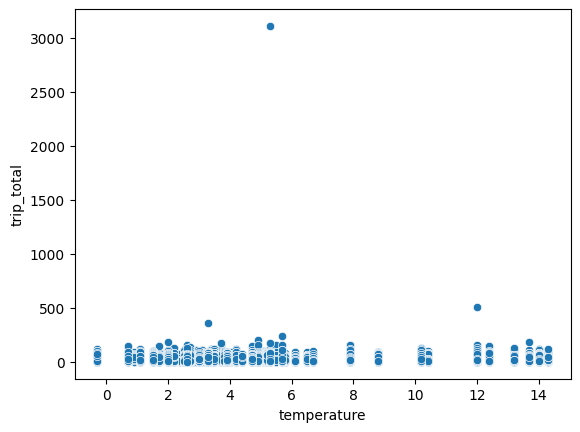

In [40]:
sns.scatterplot(data=trips_full_df, x="temperature", y="trip_total")

<Axes: xlabel='day', ylabel='trip_total'>

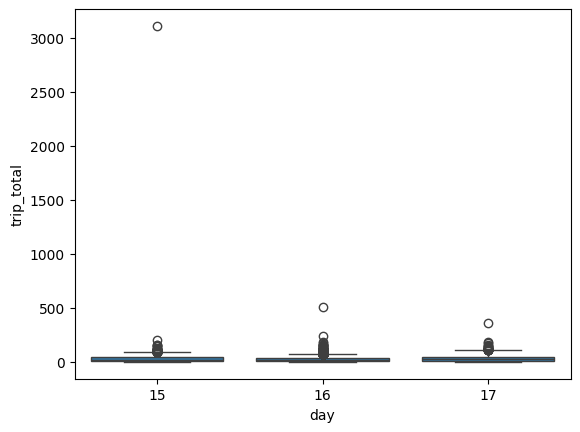

In [41]:
sns.boxplot(data=trips_full_df, x="day", y="trip_total")

<Axes: xlabel='fare', ylabel='company_y'>

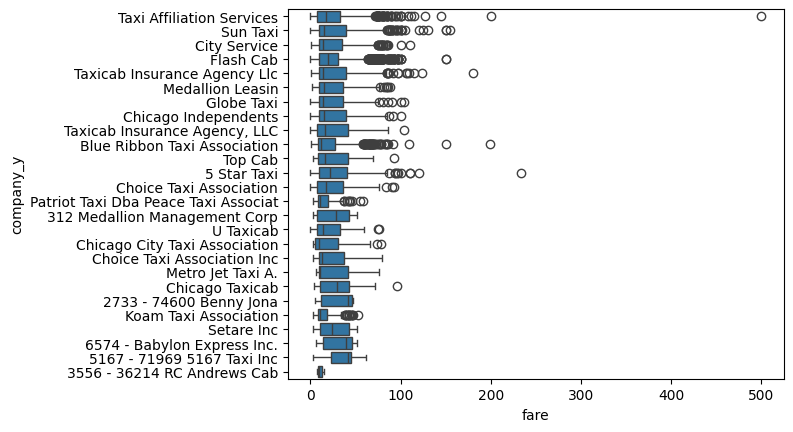

In [52]:
sns.boxplot(data=trips_full_df, y='company_y', x='fare')

<Axes: xlabel='fare', ylabel='payment_type'>

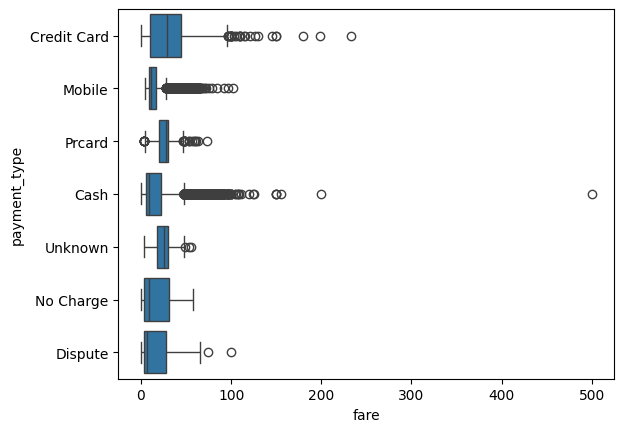

In [51]:
sns.boxplot(
    data=trips_full_df,
    y='payment_type',
    x='fare'
)


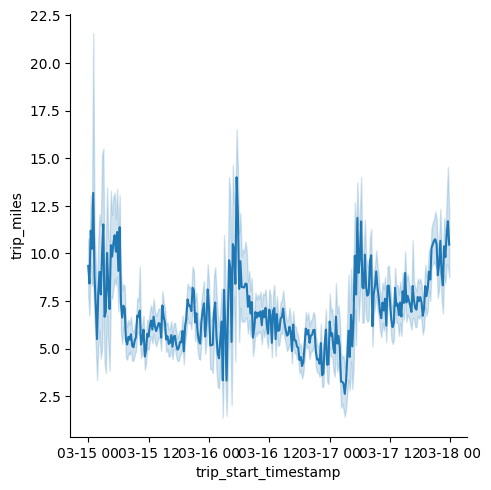

In [67]:
sns.relplot(
    data=trips_full_df,
    x='trip_start_timestamp',
    y='trip_miles',
    kind='line'
)